<a href="https://colab.research.google.com/github/iaryanraj212/AIML/blob/main/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import numpy as np

# Generate random feature vectors for two classes
np.random.seed(0)
class1_vectors = np.random.rand(100, 5)  # 100 vectors, 5 features each
class2_vectors = np.random.rand(100, 5)  # 100 vectors, 5 features each

centroid1 = np.mean(class1_vectors, axis=0)
centroid2 = np.mean(class2_vectors, axis=0)


spread1 = np.std(class1_vectors, axis=0)
spread2 = np.std(class2_vectors, axis=0)


distance = np.linalg.norm(centroid1 - centroid2)


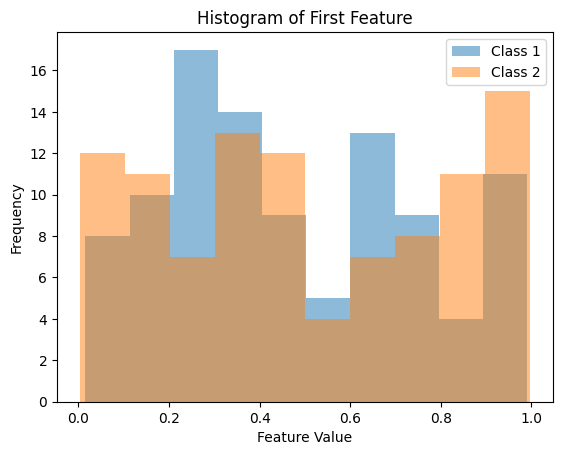

In [ ]:
import matplotlib.pyplot as plt

feature_data_class1 = class1_vectors[:, 0]  # First feature of class 1
feature_data_class2 = class2_vectors[:, 0]  # First feature of class 2

plt.hist(feature_data_class1, bins=10, alpha=0.5, label='Class 1')
plt.hist(feature_data_class2, bins=10, alpha=0.5, label='Class 2')
plt.legend(loc='upper right')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of First Feature')
plt.show()

# Calculate mean and variance for the feature
mean_class1 = np.mean(feature_data_class1)
variance_class1 = np.var(feature_data_class1)

mean_class2 = np.mean(feature_data_class2)
variance_class2 = np.var(feature_data_class2)




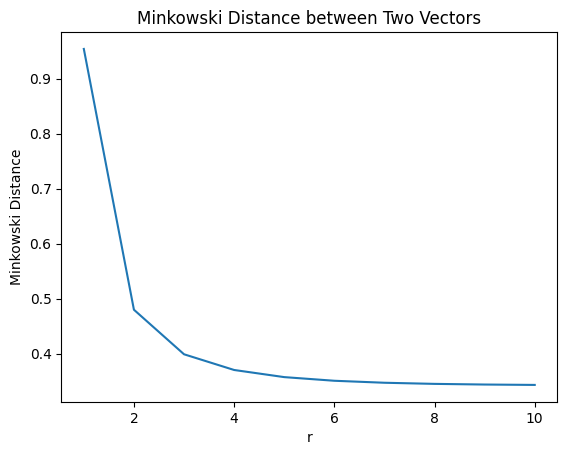

In [ ]:
vector1 = class1_vectors[0]  # First vector of class 1
vector2 = class2_vectors[0]  # First vector of class 2

minkowski_distances = []
for r in range(1, 11):
    distance = np.linalg.norm(vector1 - vector2, ord=r)
    minkowski_distances.append(distance)

plt.plot(range(1, 11), minkowski_distances)
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Vectors')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

X = np.vstack((class1_vectors, class2_vectors))  # Combine the feature vectors
y = np.hstack((np.zeros(100), np.ones(100)))  # Labels: 0 for class 1, 1 for class 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.45


In [ ]:
predictions = knn.predict(X_test)
print('Predictions:', predictions)


Predictions: [0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.]


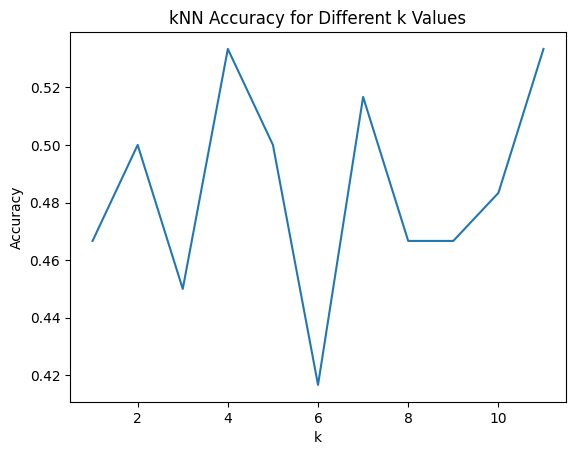

In [ ]:
accuracies = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

plt.plot(range(1, 12), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy for Different k Values')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)


Confusion Matrix:
 [[12 19]
 [ 9 20]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.39      0.46        31
         1.0       0.51      0.69      0.59        29

    accuracy                           0.53        60
   macro avg       0.54      0.54      0.52        60
weighted avg       0.54      0.53      0.52        60

